In [1]:
# 'yfinance' for extracting price data
import yfinance as module_yf

# 'pandas' for manipulating tabular data
import pandas as module_pd

# 'numpy' for numeric array manipulation
import numpy as module_np

# 'datetime' for manipulating 'datetime' data types
import datetime as module_dt

# 'matplotlib.pyplot' for creating plots
import matplotlib.pyplot as module_plt

# 'tb_custompack' for custom functions
import tb_custompack as module_tb

In [12]:
# Set specified ticker sybol from
# which data will be extracted
ticker_symbol = module_yf.Ticker(
    ticker = "RUBGBP=X",
)


import pprint as module_pp
# Print out dictionary for information
# about ticker symbol
module_pp.pprint(ticker_symbol.info)

{'algorithm': None,
 'ask': 0.008873,
 'askSize': 0,
 'averageDailyVolume10Day': 0,
 'averageVolume': 0,
 'averageVolume10days': 0,
 'beta': None,
 'bid': 0.008823,
 'bidSize': 0,
 'circulatingSupply': None,
 'currency': 'GBP',
 'dayHigh': 0.00915,
 'dayLow': 0.008211,
 'dividendRate': None,
 'dividendYield': None,
 'exDividendDate': None,
 'exchange': 'CCY',
 'exchangeTimezoneName': 'Europe/London',
 'exchangeTimezoneShortName': 'GMT',
 'expireDate': None,
 'fiftyDayAverage': 0.00963426,
 'fiftyTwoWeekHigh': 0.010519,
 'fiftyTwoWeekLow': 0.008211,
 'fiveYearAvgDividendYield': None,
 'forwardPE': None,
 'fromCurrency': None,
 'gmtOffSetMilliseconds': '0',
 'isEsgPopulated': False,
 'lastMarket': None,
 'logo_url': '',
 'market': 'ccy_market',
 'marketCap': None,
 'maxAge': 1,
 'maxSupply': None,
 'messageBoardId': 'finmb_RUBGBP_X',
 'navPrice': None,
 'open': 0.009033,
 'openInterest': None,
 'payoutRatio': None,
 'preMarketPrice': None,
 'previousClose': 0.009042,
 'priceHint': 4,
 'p

In [13]:
# Extract historical price data for ticker
dataframe_ticker_data = ticker_symbol.history(
    interval = '1d',
    period = 'max'
).dropna()

In [14]:
# Reset the indexing of the data frame, so new
# 'Date' column is generated
dataframe_prep = dataframe_ticker_data.reset_index()

In [15]:
# Code for implementing Heikin Ashi indicator
# series

# Isolate the candlestick price data
dataframe_isolated = dataframe_prep[
    [
        'Open',
        'High',
        'Low',
        'Close'
    ]
]

# Create an intitial value for Heikin Ashi
float_initial = (
    dataframe_isolated.iloc[0][1] + 
    dataframe_isolated.iloc[0][2] - 
    dataframe_isolated.iloc[0][0] - 
    dataframe_isolated.iloc[0][3]
) / 4

# Create list of Heikin Ashi closes from
# candlestick price data
list_hclose = list(module_np.mean(dataframe_isolated.T))

# Create Heikin Ashi indicator list
list_ha = module_tb.function_heikin_ashi_gen(
    list_values = list_hclose,
    float_initial = float_initial,
    float_strength = 0.5
)

# Add indicator to standard indexed dataframe
dataframe_prep['Indicator'] = module_pd.Series(list_ha)

In [16]:
# Reassign 'Date' as index series for final dataframe
dataframe_ticker_data = dataframe_prep.set_index('Date')

In [22]:
# Set the initial trading time
datetime_start = module_dt.datetime(
    year = 2020,
    month = 1,
    day = 1
)

# Set the final trading time
datetime_end = module_dt.datetime(
    year = 2022,
    month = 3,
    day = 1
)

# Select all price and indicator data
# falling within the chosen time bound
dataframe_selected_data = dataframe_ticker_data.loc[
    datetime_start:datetime_end
].reset_index()

# Create list of close prices
list_close = list(dataframe_selected_data['Close'])

# Create list for long indicator
list_long_indicator = list(dataframe_selected_data['Indicator'])

# Create list for short indicator
list_short_indicator = list(-dataframe_selected_data['Indicator'])

# Create list for dates
list_dates = list(dataframe_selected_data['Date'])

In [23]:
# Create alpha series for long position
list_long_alpha = module_tb.function_backtester(
    list_prices = list_close,
    list_indicator = list_long_indicator,
    float_ratio = 1
)

In [24]:
# Create alpha series for short position
list_short_alpha = module_tb.function_backtester(
    list_prices = list_close,
    list_indicator = list_short_indicator,
    float_ratio = -1
)

In [25]:
# Create full alpha series
list_full_alpha = [

    list_long_alpha[int_i] *
    list_short_alpha[int_i]

    for int_i
    in range(
        0,
        len(list_long_alpha)
    )
]

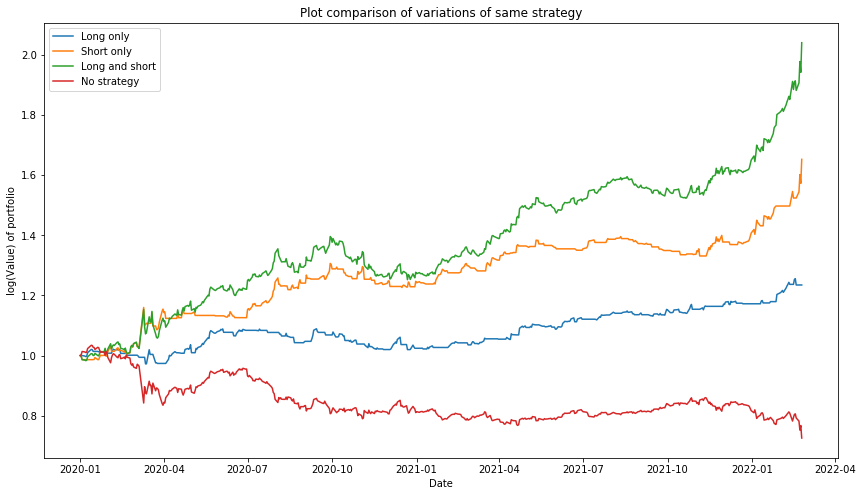

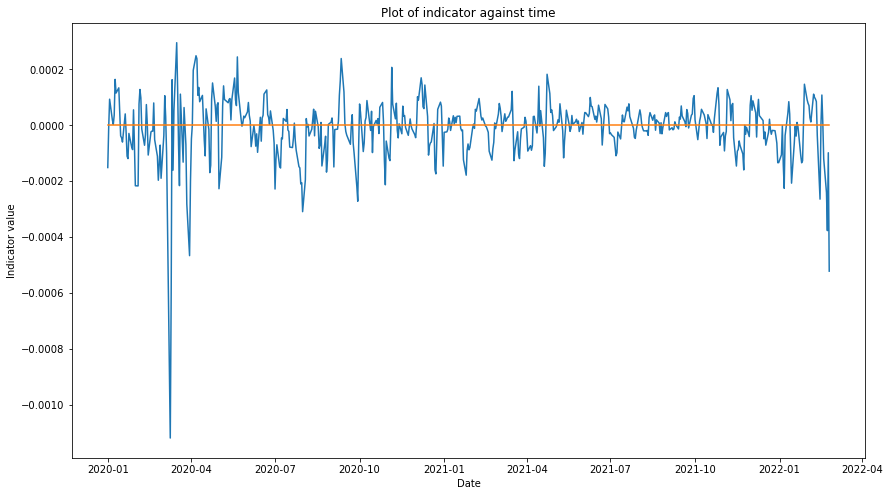

In [26]:
# Code for plot creation

module_plt.figure(
    num = 0,
    figsize = (8 * (16 / 9), 8)
)

module_plt.plot(
    list_dates,
    module_np.cumprod(list_long_alpha),
    label = "Long only"
)

module_plt.plot(
    list_dates,
    module_np.cumprod(list_short_alpha),
    label = "Short only"
)

module_plt.plot(
    list_dates,
    module_np.cumprod(list_full_alpha),
    label = "Long and short"
)

module_plt.plot(
    list_dates,
    module_np.array(list_close) / list_close[0],
    label = "No strategy"
)

module_plt.xlabel("Date")

module_plt.ylabel("log(Value) of portfolio")

module_plt.title("Plot comparison of variations of same strategy")

module_plt.legend()

module_plt.show()


module_plt.figure(
    num = 0,
    figsize = (8 * (16 / 9), 8)
)

module_plt.plot(
    list_dates,
    list_long_indicator
)

module_plt.plot(
    list_dates,
    [0] * len(list_dates)
)

module_plt.xlabel("Date")

module_plt.ylabel("Indicator value")

module_plt.title("Plot of indicator against time")

module_plt.show()